# Rainfall Prediction

#### We use the Linear Regression Algorithm to predict how many inches of rainfall can we expect, based on the environmental conditions.

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [9]:
#reading file
rain_df = pd.read_csv("austin_weather.csv")
rain_df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [10]:
#dropping unnecessary columns
rain_df.drop(["Events","Date","SeaLevelPressureLowInches"], axis=1, inplace=True)

In [11]:
#replacing null, inconsistent values
rain_df = rain_df.replace("T",0.0)
rain_df = rain_df.replace("-",0.0)

In [79]:
#writing this data to a csv file
rain_df.to_csv("austin_weather_final.csv")

In [81]:
data = pd.read_csv("austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [82]:
X = data.drop(["PrecipitationSumInches"], axis=1)
Y = data["PrecipitationSumInches"]

In [83]:
#reshaping it into a 2d vector format
Y = Y.values.reshape(-1,1)
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [85]:
#taking a random day and making a list of all the days
day_random = 798
days = [i for i in range(Y.size)]

In [105]:
#initialising the Regression Classifier
clf = LinearRegression()

In [106]:
#training the classifier
clf.fit(X,Y)

LinearRegression()

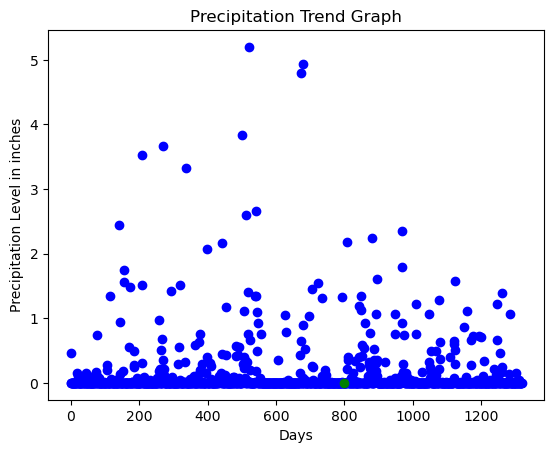

In [88]:
#plotting a scatterplot to show the precipitation amount by date
plt.scatter(days,Y,color='b')
plt.scatter(days[day_random],Y[day_random],color='g')
plt.title("Precipitation Trend Graph")
plt.xlabel("Days")
plt.ylabel("Precipitation Level in inches")
plt.show()

In [91]:
#adding filter
x_vis = X.filter(["TempAvgF","DewPointAvg","HumidityAvgPercent","SeaLevelPressureAvgInches","VisibilityAvgMiles","WindAvgMPH"])
x_vis

,TempAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,75.0,29.68,7.0,4.0
1,48,68.0,30.13,10.0,6.0
2,45,52.0,30.49,10.0,3.0
3,46,56.0,30.45,10.0,4.0
4,50,71.0,30.33,10.0,2.0
...,...,...,...,...,...
1314,89,54.0,29.97,10.0,5.0
1315,91,54.0,29.90,10.0,5.0
1316,92,51.0,29.86,10.0,4.0
1317,93,48.0,29.91,10.0,4.0


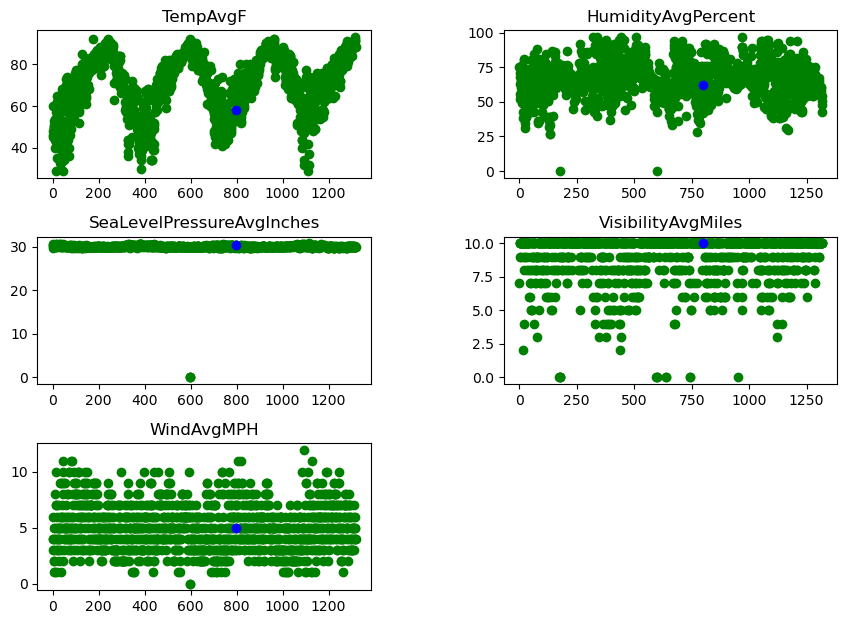

In [104]:
#plotting scatterplot of precipitation vs some features
plt.figure(figsize =(10, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range (x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color='g')
    plt.scatter(days[day_random],x_vis[x_vis.columns.values[i]][day_random],color='b')
    plt.title(x_vis.columns.values[i])

#### We infer that we can expect a heavy rainfall when the temperature and humidity is high.